In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
some_ints_1 = pd.Series(np.random.randint(20, 30, size=40))
some_ints_2 = pd.Series(np.random.randint(20, 30, size=40))

df = pd.DataFrame()
# df['A'] = some_ints_1
df['B'] = some_ints_2

numbers = sorted(df['B'].unique())
# print(numbers)

df['C'] = df.shift(-1)

groups = df.groupby(['B', 'C'])
counts = {i[0]:(len(i[1]) if i[0][0] != i[0][1] else 0) for i in groups}
# counts = {i[0]:len(i[1]) for i in groups} # count even (816,816)
# print(counts)

matrix = pd.DataFrame()

for x in numbers:
    matrix[str(x)] = pd.Series([counts.get((x, y), 0) for y in numbers], index=numbers)

print(matrix + matrix + matrix)

def construct_transition_matrix(ts):
    df = pd.DataFrame(ts, columns='B')

    elements = sorted(df['B'].unique())
    df['C'] = df.shift(-1)

    groups = df.groupby(['B', 'C'])
    counts = {i[0]:(len(i[1]) if i[0][0] != i[0][1] else 0) for i in groups}

    matrix = pd.DataFrame()

for x in elements:
    matrix[x] = pd.Series([counts.get((x, y), 0) for y in numbers], index=numbers)

return matrix
    


    20  21  22  23  24  25  26  27  28  29
20   0   0   0   0   0   6   0   0   3   0
21   3   0   0   0   0   0   0   3   0   3
22   0   3   0   3   0   0   0   0   3   0
23   3   0   0   0   3   0   3   0   3   0
24   0   0   0   6   0   0   0   3   0   3
25   0   0   3   0   0   0   0   0   3   0
26   0   0   0   3   3   0   0   0   3   0
27   0   3   0   0   3   0   0   0   0   3
28   0   0   3   3   0   0   3   3   0   6
29   3   3   0   0   3   0   3   0   3   0


<AxesSubplot:>

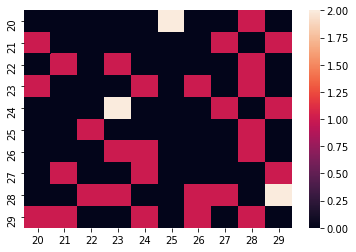

In [32]:
sns.heatmap(matrix)